In [1]:
from pymongo import MongoClient
import pandas as pd
import re
import numpy as np
from src.data_processing import get_recipe_df
from src.recipe_annotation import Recipe, RecipeGroup

In [2]:
client = MongoClient()
db = client['recipes']
coll = db.eda_cookies

cookie_regx = re.compile("cookie", re.IGNORECASE)

df_cookies = get_recipe_df(coll, cookie_regx)

choc_chip_keys = df_cookies.index[df_cookies.label.str.contains("chocolate.chip.cookies", case=False, regex=True)]

In [3]:
choc_chip_group = RecipeGroup(df_cookies, choc_chip_keys)

In [4]:
# choc_chip_group.show_tnse_plot()

In [6]:
choc_chip_group.get_group_description()

'core ingredients:\n   chocol, in 93.6%  of recipes\n   salt, in 92.3%  of recipes\n   butter, in 85.9%  of recipes\n   bake soda, in 85.5%  of recipes\n   flour, in 85.0%  of recipes\n   egg, in 83.3%  of recipes\n   sugar, in 80.8%  of recipes\n   brown sugar, in 77.4%  of recipes\n   vanilla extract, in 70.9%  of recipes\ncommon ingredients:\n   bake powder, in 28.6%  of recipes\n   vanilla, in 20.1%  of recipes\n   oat, in 10.7%  of recipes\nuncommon ingredients:\n   cinnamon, in  9.0%  of recipes\n   walnut, in  8.5%  of recipes\n   milk, in  7.7%  of recipes\n   egg yolk, in  7.7%  of recipes\n   white chocol, in  6.8%  of recipes\n   whole wheat flour, in  6.0%  of recipes\n   cocoa powder, in  4.3%  of recipes\n   coconut oil, in  4.3%  of recipes\n   whole wheat, in  3.8%  of recipes'

In [20]:
for recp in choc_chip_group.members.itervalues():
    print recp.label

coconut chocolate chip cookies
chocolate chip cookies
banana-oatmeal chocolate chip cookies
gluten-free tuesday: vegan chocolate chip cookies
refreshing mint-chocolate chip cookies
giant chewy chocolate chip cookies
pumpkin spice chocolate chip cookies
bacon chocolate chip cookies {topped with sea salt}
chocolate chip cookies recipe
mocha chocolate chip cookies
quinoa-granola chocolate chip cookies
chocolate chip cookies
mint chocolate chip cookies
chewy mint chocolate chip cookies
cherry, almond chocolate chip cookies
chocolate chip cookies
best ever vegan chocolate chip cookies recipe
salty sesame and dark chocolate chip cookies
chocolate chocolate chip cookies
gluten free white chocolate chip cookies
chocolate chip cookies
chocolate chocolate chip cookies
chocolate chip cookies recipe
wheat bran chocolate chip cookies
crisp chocolate chip cookies with dried cherries and pistachios
double chocolate-chip cookies
banana chocolate chip cookies
salted chocolate chip cookies
zucchini choc

In [7]:
print choc_chip_group.desc

core ingredients:
   chocol, in 93.6%  of recipes
   salt, in 92.3%  of recipes
   butter, in 85.9%  of recipes
   bake soda, in 85.5%  of recipes
   flour, in 85.0%  of recipes
   egg, in 83.3%  of recipes
   sugar, in 80.8%  of recipes
   brown sugar, in 77.4%  of recipes
   vanilla extract, in 70.9%  of recipes
common ingredients:
   bake powder, in 28.6%  of recipes
   vanilla, in 20.1%  of recipes
   oat, in 10.7%  of recipes
uncommon ingredients:
   cinnamon, in  9.0%  of recipes
   walnut, in  8.5%  of recipes
   milk, in  7.7%  of recipes
   egg yolk, in  7.7%  of recipes
   white chocol, in  6.8%  of recipes
   whole wheat flour, in  6.0%  of recipes
   cocoa powder, in  4.3%  of recipes
   coconut oil, in  4.3%  of recipes
   whole wheat, in  3.8%  of recipes


In [8]:
typical_r = choc_chip_group.find_typical_recipe(freq_cos_ratio=0.6, health_labels=[])

In [9]:
print typical_r

CHOCOL: 340.2g    |   used in 93.6%  of recipes|
     avg: 292.8g  | range:  0.0g - 1220.6g       |  std: 12.1264g
------------------------------------------------------------
SALT:  4.5g       |   used in 92.3%  of recipes|
     avg:   4.3g  | range:  0.5g - 13.8g       |  std: 0.0044g
------------------------------------------------------------
BUTTER: 170.2g    |   used in 85.9%  of recipes|
     avg: 183.1g  | range: 42.5g - 433.3g       |  std: 2.1635g
------------------------------------------------------------
BAKE SODA:  4.6g  |   used in 85.5%  of recipes|
     avg:   4.0g  | range:  1.3g - 15.2g       |  std: 0.0025g
------------------------------------------------------------
FLOUR: 296.9g     |   used in 85.0%  of recipes|
     avg: 269.6g  | range: 11.0g - 735.8g       |  std: 7.2903g
------------------------------------------------------------
EGG: 100.0g       |   used in 83.3%  of recipes|
     avg:  77.3g  | range: 24.8g - 229.5g       |  std: 0.5800g
-----------------

In [10]:
print typical_r.line_text

3/4 cup butter, softened
3/4 cup granulated sugar
3/4 cup firmly packed dark brown sugar
2 large eggs
1 1/2 teaspoons vanilla extract
2 1/4 cups plus 2 tablespoons all-purpose flour
1 teaspoon baking soda
3/4 teaspoon salt
1 (12-ounce) package semisweet chocolate morsels


In [19]:
tot =0
for ingred, percent in typical_r.per_mass.iteritems():
    print "{}: {:4.2f}%".format(ingred, percent*100)
    tot += percent * 100
print tot

butter: 13.77%
chocol: 27.51%
vanilla extract: 0.51%
flour: 24.00%
bake soda: 0.37%
brown sugar: 13.34%
sugar: 12.13%
salt: 0.36%
egg: 8.09%
100.080792706


In [11]:
print typical_r.label

ultimate chocolate chip cookies


In [12]:
print typical_r.key

http://www.myrecipes.com/recipe/ultimate-chocolate-chip-cookies


In [22]:
emb2d = TSNE().fi

None


In [12]:
typical_r.health

[u'Vegan', u'Vegetarian', u'Peanut-Free', u'Alcohol-Free']

In [13]:
coll.find_one()

{u'_id': ObjectId('59a634b0e970dc0c0b022a1d'),
 u'calories': 7171.664670786857,
 u'cautions': [],
 u'dietLabels': [],
 u'digest': [{u'daily': 491.96225123830936,
   u'hasRDI': True,
   u'label': u'Fat',
   u'schemaOrgTag': u'fatContent',
   u'sub': [{u'daily': 969.3006355402233,
     u'hasRDI': True,
     u'label': u'Saturated',
     u'schemaOrgTag': u'saturatedFatContent',
     u'tag': u'FASAT',
     u'total': 193.86012710804465,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Trans',
     u'schemaOrgTag': u'transFatContent',
     u'tag': u'FATRN',
     u'total': 9.330973942871093,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Monounsaturated',
     u'schemaOrgTag': None,
     u'tag': u'FAMS',
     u'total': 88.81004426345349,
     u'unit': u'g'},
    {u'daily': 0.0,
     u'hasRDI': False,
     u'label': u'Polyunsaturated',
     u'schemaOrgTag': None,
     u'tag': u'FAPU',
     u'total': 15.186441522727014,
     u'uni

In [14]:
ll = ['b','a','c']

In [15]:
set(ll)

{'a', 'b', 'c'}

In [16]:
all([])

True

In [17]:
np.isin(['a','b'], set(ll))

array([False, False], dtype=bool)

In [18]:
arr = np.array([[1,2,3],[5,0,1]])

In [19]:
arr.max(axis=0)

array([5, 2, 3])

In [20]:
new_group = RecipeGroup(df_cookies,
                        member_keys={'http://userealbutter.com/2008/08/01/cranberry-oatmeal-cookies-recipe/'})

In [21]:
new_group.grow_by_linkage(group_size=20)

In [22]:
for recp in new_group.members.itervalues():
    print recp.label

the best oatmeal raisin cookies
anytime oatmeal cookies
oatmeal-chocolate chip cookies
oatmeal cookies with chocolate covered cranberries
cranberry walnut oatmeal cookies
double-chocolate cranberry oatmeal cookies
oatmeal cranberry cookies
mexican oatmeal cookies
jumbo pecan-date oatmeal cookies
oatmeal-chocolate chip cookies
maggie's favorite oatmeal cookies
cranberry oatmeal cookies
crisp salted oatmeal white chocolate cookies
oatmeal chocolate chip cookie
oatmeal-raisin cookies
apricot and white chocolate oatmeal cookies
cranberry oatmeal cookies
kitchen sink oatmeal cookies
thin and crisp oatmeal cookies with sea salt
trout dale oatmeal-raisin cookies


In [23]:
oatmeal = new_group.find_typical_recipe()

In [24]:
print oatmeal

BUTTER: 227.0g    |   used in 100.0%  of recipes|
     avg: 175.6g  | range: 130.3g - 242.4g       |  std: 1.0731g
------------------------------------------------------------
FLOUR: 187.5g     |   used in 100.0%  of recipes|
     avg: 144.4g  | range: 80.0g - 188.4g       |  std: 0.6940g
------------------------------------------------------------
BAKE SODA:  4.6g  |   used in 100.0%  of recipes|
     avg:   3.2g  | range:  1.6g -  5.9g       |  std: 0.0010g
------------------------------------------------------------
OAT: 240.0g       |   used in 100.0%  of recipes|
     avg: 209.0g  | range: 92.5g - 330.3g       |  std: 4.0040g
------------------------------------------------------------
SUGAR: 100.0g     |   used in 100.0%  of recipes|
     avg: 129.7g  | range: 68.9g - 274.0g       |  std: 3.2778g
------------------------------------------------------------
SALT:  3.0g       |   used in 100.0%  of recipes|
     avg:   3.6g  | range:  1.1g -  8.3g       |  std: 0.0032g
------------

In [25]:
print oatmeal.line_text

3 cups rolled oats
1 block of mexican chocolate
1 cup butter, softened
1 cup brown sugar
1/2 cup white sugar
2 eggs
1 teaspoon vanilla extract
1 1/2 cups all-purpose flour
1 teaspoon baking soda
2 teaspoons ground cinnamon, or more to taste
1/2 teaspoon salt


In [26]:
print oatmeal.per_mass

{'butter': 0.22660743375471845, 'vanilla extract': 0.0041927364693739189, 'flour': 0.18717574374013088, 'bake soda': 0.0045920448178887047, 'oat': 0.23958495198736754, 'cinnamon': 0.0051910071026546167, 'sugar': 0.099827063328069801, 'salt': 0.0029948118998420941, 'egg': 0.085851274462140026, 'brown sugar': 0.1447492418257012}


In [ ]:
o

In [27]:
print new_group

core ingredients:
   bake soda, in 100.0%  of recipes
   brown sugar, in 100.0%  of recipes
   egg, in 100.0%  of recipes
   sugar, in 100.0%  of recipes
   oat, in 100.0%  of recipes
   flour, in 100.0%  of recipes
   butter, in 100.0%  of recipes
   salt, in 100.0%  of recipes
   vanilla extract, in 90.0%  of recipes
common ingredients:
   cinnamon, in 55.0%  of recipes
   chocol, in 30.0%  of recipes
   cranberri, in 30.0%  of recipes
   raisin, in 25.0%  of recipes
   bake powder, in 20.0%  of recipes
uncommon ingredients:
   almond, in  5.0%  of recipes
   walnut, in  5.0%  of recipes
   clove, in  5.0%  of recipes
   milk, in  5.0%  of recipes
   cocoa powder, in  5.0%  of recipes
   water, in  5.0%  of recipes
   pecan, in  5.0%  of recipes


In [28]:
from src.feature_building import token_pipeline

In [29]:
token_pipeline('1 block of mexican chocolate')

[u'block', u'mexican', u'chocol']

In [37]:
peanut_group = RecipeGroup(df_cookies, member_keys={'http://www.seriouseats.com/recipes/2012/12/peanut-butter-holiday-cookies-recipe.html'})

In [38]:
peanut_group.grow_by_linkage(100)

In [39]:
for recp in peanut_group.members.itervalues():
    print recp.label

toffee chunk cookies
recipe: easter m&m cookies
ultimate chocolate chip cookies
chewy mint chocolate chip cookies
alexis's brown sugar chocolate chip cookies
granola-chocolate cookies
banana chocolate chip cookies
cashew-caramel cookies
best blueberry cookies
chocolate chip cookie pie
crispy chocolate chip cookies
chubby chewy chocolate chip cookies
banana-walnut chocolate chunk cookies
light peanut butter cookies
ooey-gooey gluten-free chocolate chip cookies
everything but the kitchen sink cookies
salted brown butter chocolate chip cookies
compost cookies
toffee-pretzel peanut butter cookies
brown butter chocolate chip cookies with pecans
chunky peanut, chocolate, and cinnamon cookies
salted shortbread cookies
new york times chocolate chip cookies
oatmeal chocolate chip cookie
candy-corn-and-chocolate-chip cookies
giant chewy chocolate chip cookies
cakey chocolate chip cookies
peanut butter oat cookies
chocolate chip cookies
salted turtle cookies
chocolate-chocolate cookies recipe
ult

In [40]:
print peanut_group

core ingredients:
   salt, in 100.0%  of recipes
   butter, in 99.0%  of recipes
   flour, in 98.0%  of recipes
   egg, in 96.0%  of recipes
   sugar, in 95.0%  of recipes
   brown sugar, in 94.0%  of recipes
   bake soda, in 89.0%  of recipes
   vanilla extract, in 86.0%  of recipes
   chocol, in 76.0%  of recipes
common ingredients:
   bake powder, in 25.0%  of recipes
   peanut butter, in 19.0%  of recipes
   oat, in 12.0%  of recipes
uncommon ingredients:
   vanilla, in  8.0%  of recipes
   cherri, in  5.0%  of recipes
   macadamia nut, in  4.0%  of recipes
   walnut, in  4.0%  of recipes
   cinnamon, in  4.0%  of recipes
   coconut, in  3.0%  of recipes
   milk, in  3.0%  of recipes
   cocoa powder, in  3.0%  of recipes
   pecan, in  3.0%  of recipes


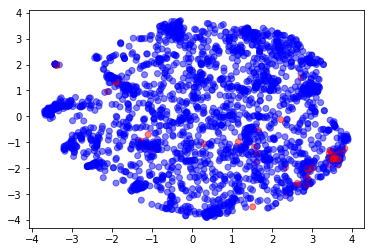

In [41]:
peanut_group.show_tsne_plot()

In [ ]:
peanut = peanut_group.find_typical_recipe()

In [ ]:
print peanut.line_text

In [ ]:
print peanut